In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")
np.seterr(divide='ignore');

# One dimensional nonlinear equations

## Example 1)

In this activity, we will find the root of nonlinear equations using three different iterative methods. For each one, you should be thinking about cost and convergence rate.

The iterative methods below can be applied to more complex equations, but here we will use a simple nonlinear equation of the form:

$$f(x) = e^x - 2 $$

The exact root that satisfies $f(x) = 0$ is $x = ln(2) \approx 0.693147$. We can take a look at the function in the interval $[-2,2]$.


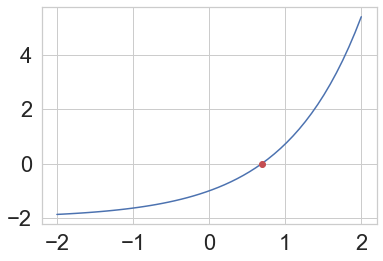

In [2]:
a0 = -2
b0 = 2

x = np.linspace(a0, b0)

def f(x):
    return np.exp(x) - 2

def df(x):
    return np.exp(x)


xtrue = np.log(2)

plt.plot(x, f(x))
plt.plot(xtrue,0,'ro')

In [ ]:
# a0 = 0
# b0 = 4

# x = np.linspace(a0, b0)

# def f(x):
#     return 0.5*x**2 - 2

# def df(x):
#     return x

# xtrue = 2

# plt.plot(x, f(x))
# plt.plot(xtrue,0,'ro')

### a) Bisection Method

#### First we will run the iterative process for a few iterations:

In [ ]:
a = a0
b = b0
interval = np.abs(a - b)   
errors = []

fa = f(a)

for i in range(12):
    m = (a+b)/2
    fm = f(m)   
    if  np.sign(fa) == np.sign(fm):
        a = m 
        fa = fm # this line is not really needed, 
        # since we only need the sign of a, and sign of a is the same as sign of m
    else:
        b = m
    interval = np.abs(a - b)    
    errors.append(interval)        
    print("%10g \t %10g \t %12g" % (a, b, interval))
    
print('exact root is = ', np.log(2))

#### Now we will add a stopping criteria. 

Since we know the interval gets divided by two every iteration, how many iterations do we need to perform to achieve the tolerance $2^{-k}$?

Note that only one function evaluation is needed per iteration!

We can also verify the linear convergence, with C = 0.5

In [ ]:
a = a0
b = b0
interval = np.abs(a - b)   
errors = [interval]

fa = f(a)
count = 0

while count < 30 and interval > 2**(-4):
    m = (a+b)/2
    fm = f(m)   
    if  fa*fm > 0:
        a = m 
    else:
        b = m
    interval = np.abs(a - b)    
    errors.append(interval)        
    print("%10g \t %10g \t %12g %12g" % (a, b, interval, interval/errors[-2]))
    
print('exact root is = ', np.log(2))

In [ ]:
plt.plot(errors)
plt.ylabel('Error (interval size)')
plt.xlabel('Iterations')

What happens if you have multiple roots inside the interval? Bisection method will converge to one of the roots. Try to run the code snippet above using the function 

$$ f(x) = 0.5 x^2 - 2 $$

Change the interval, and observe what happens.

### b) Newton's Method

In [ ]:
x0 = 2
r = 2

In [ ]:
x = x0
count = 0
tol = 1e-6
err = 1
errors = [err]

while count < 30 and err > tol:
    x = x - f(x)/df(x)
    err = abs(x-xtrue)
    errors.append(err)
    print('%10g \t%10g \t %.16e %.4g' % (x, f(x), err, errors[-1]/(errors[-2]**r) ))

### c) Secant Method

In [ ]:
x0 = 2
x1 = 8
r = 2
#r = 1.618

In [ ]:
# Need two initial guesses
xbefore = x0
x = x1
count = 0
tol = 1e-8
err = 1
errors = [err]

while count < 30 and err > tol:

    df_approx = (f(x)-f(xbefore))/(x-xbefore)
    xbefore = x
    x = x - f(x)/df_approx
    err = abs(x-xtrue)
    errors.append(err)
    print('%10g \t%10g \t %.16e %.4g' % (x, f(x), err, errors[-1]/errors[-2]**r ))

### d) Using scipy functions for root finding:

In [ ]:
import scipy.optimize as opt

In [ ]:
opt.root_scalar(f,bracket=[-2, 3],method='bisect')

In [ ]:
opt.root_scalar(f,bracket=[-2, 3])

In [ ]:
opt.root_scalar(f,x0=3, fprime=df, method='newton')

In [ ]:
opt.root_scalar(f,x0=3,x1=4, method='secant')

## Example 2)

### a) Graphical convergence of Newton's Method

Let's take a look at this other function

$$f(x) = x^3 - x + 1 $$

And we plot it in the interval $[-4,4]$.


In [ ]:
def f(x):
    return x**3 - x +1

def df(x):
    return 3*x**2 - 1

xmesh = np.linspace(-4, 4, 100)
plt.ylim([-5, 10])
plt.plot(xmesh, f(xmesh))

xexact = -1.324717957244746


In [ ]:
guesses = [-.9]
guesses = [1.5]

Evaluate this cell many times in-place (using Ctrl-Enter)

In [ ]:
x = guesses[-1] # grab last guess

slope = df(x)

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + slope*(xmesh-x))
plt.plot(x, f(x), "o")
plt.xlim([-4, 4])
plt.ylim([-5, 10])
plt.axhline(0, color="black")

# Compute approximate root
xnew = x - f(x) / slope
guesses.append(xnew)
print(xnew)


In [ ]:
f(xnew)

In [ ]:
print(guesses)

In [ ]:
error = abs(np.array(guesses)-xexact)

In [ ]:
plt.semilogy(error)

### b) Graphical convergence of Secant Method

In [ ]:
guesses = [2, 1.7]

In [ ]:
# grab last two guesses
x = guesses[-1]
xbefore = guesses[-2]

slope = (f(x)-f(xbefore))/(x-xbefore)

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + slope*(xmesh-x))
plt.plot(x, f(x), "o")
plt.plot(xbefore, f(xbefore), "o")
plt.ylim([-4, 4])
plt.ylim([-3, 10])
plt.axhline(0, color="black")

# Compute approximate root
xnew = x - f(x) / slope
guesses.append(xnew)
print(xnew)

# N-Dimensional Nonlinear Equations

We will solve the following system of nonlinear equations:

$$ x + 2y = 2 $$

$$ x^2 + 4y^2 = 4 $$

We will define our vector valued function ${\bf f}$, which takes a vector as argument, with the components $x$ and $y$. We are trying to find the numerical (approximated) solution that safisfies:

$${\bf f} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}
          = \begin{bmatrix} x + 2y - 2 \\ x^2 + 4y^2 - 4 \end{bmatrix}
          = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$
          
and the exact solution is $[0,1]$

We will also define the gradient of ${\bf f}$, $\nabla{\bf f}$, which we call the Jacobian.

### Newton's method

In [ ]:
def f(xvec):
    x, y = xvec
    return np.array([
        x + 2*y -2,
        x**2 + 4*y**2 - 4
        ])

def Jf(xvec):
    x, y = xvec
    return np.array([
        [1, 2],
        [2*x, 8*y]
        ])

Pick an initial guess.

In [ ]:
x = np.array([1, 2])

Now implement Newton's method.

In [ ]:
for i in range(10):
    s = la.solve(Jf(x), -f(x))
    x = x + s
x

Check if that's really a solution:

In [ ]:
f(x)

The cost is $O(n^3)$ per iteration, since the Jacobian changes every iteration. But how fast is the convergence?

In [ ]:
r = 2

xtrue = np.array([0, 1])
x = np.array([1, 2])
errors = [la.norm(x)]

while errors[-1] > 1e-12:
    A = Jf(x)
    s = la.solve(A, f(x))
    x = x - s
    err = la.norm(x-xtrue)
    errors.append(err)
    print(' %.16e \t %.4g' % (err, errors[-1]/errors[-2]**r ))

# Combining Newton's method with Bisection

Newton's method features a quadratic convergence rate, but is not guaranteed to converge unless the algorithm is started sufficiently close to the root of a function $f$.  For example, the function

$$ f(x) = \tanh(20x)$$,

where $\tanh$ is the hyperbolic tangent function, has a single root at $x = 0$, but Newton's method will quickly diverge even at modest distances from the root.

Create functions that evaluate this function and it's derivative.  Recall that:

$$\frac{d}{dz}\tanh(z) = 1 - \tanh^2(z)$$

In [3]:
def f(x):
    return np.tanh(20*x)

def df(x):
    return 20*(1 - f(x)**2)

def df(x):
    return 20*(1 - np.tanh(20*x)**2)

Plot the function and its derivative over the interval $[-2,2]$.  Use two different plots for the function and its derivative

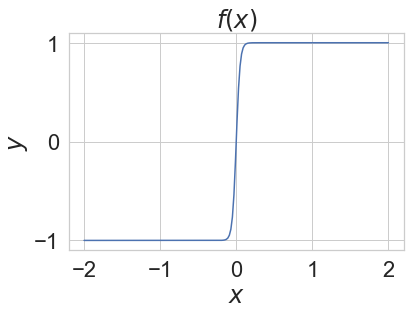

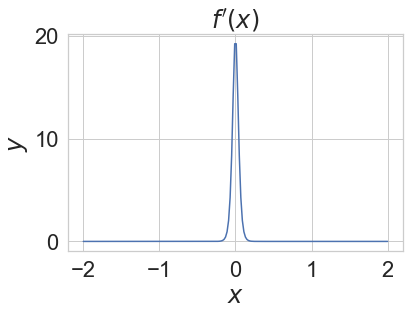

In [4]:
a0 = -2
b0 = 2

xmesh = np.linspace(a0, b0,200)
plt.plot(xmesh, f(xmesh))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$f(x)$')
plt.show()
plt.plot(xmesh,df(xmesh))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$f\'(x)$')
plt.show()

You should notice that $f'(x) \approx 0$ for most values of the input $x$.  Newton's method, which is given by:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

will divide by a very small number unless $x_k \approx 0$.

Even with a starting guess of $x_0 = 0.06$, Newton's method will diverge.

In [5]:
guesses = [0.06]

###### Evaluate the next cell many times in-place (using Ctrl-Enter)
The green dot is the current guess, and the orange line is the corresponding tangent line.  The next iterate will be where the tangent line intersects $x$-axis.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


Next iterate will be:  nan


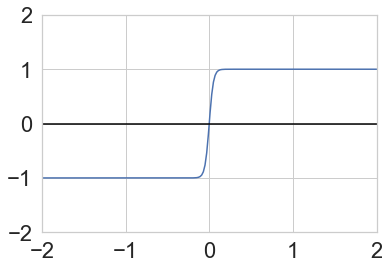

In [10]:
x = guesses[-1] # grab last guess
slope = df(x)

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + slope*(xmesh-x))
plt.plot(x, f(x), "o")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axhline(0, color="black")

# Compute approximate root
xnew = x - f(x) / slope
guesses.append(xnew)

print('Next iterate will be: ', xnew)


On the other hand, the bisection method will always find the root of this function, as long as the initial interval endpoints are of opposite sign.  It will not converge as fast as Newton's method, however.  To get the best of both worlds, we can combine the two as follows.

###### Algorithm
We start with an initial interval $[a,b]$ such that $f(a)\cdot f(b) < 0$ (so that the function values have opposite signs).  We set $c = \text{argmin}_{z=a,b} |f(z)|$, i.e.

$ c = a\hspace{7mm} \text{if  } |f(a)| < |f(b)|$

$ c = b\hspace{7mm} \text{if  } |f(b)| < |f(a)|$

and try to begin a Newton iteration from there (**Question**: why do we select $c$ in this way, why not the reversed inequalities?).  

If the Newton iteration takes us outside the open interval $(a,b)$, then we are not getting any closer to the desired root, and may even be diverging.  In this case, we fall back to the bisection method. 

I.e. we first try:

$m = c - \frac{f(c)}{f'(c)}$

and if $m \geq b$ or $m \leq a$, we scrap this value of $m$ and use the bisection method instead:

$ m = \frac{a + b}{2}$.


Using the same criteria as the standard bisection method, we then update either $a$ or $b$ to have the value $m$.  We then repeat the process and choose the next value of $c = \text{argmin}_{z=a,b} |f(z)|$.  We can terminate whenever $|f(c)| < \text{tol}$.

Write a function that combines the two ideas.  Your function should return the root, as well as a list of tuples that stores $|f(c)|$ and what kind of step was taken:

In [ ]:
# clear with hints
def bisection_Newton(a0,b0,tol,f,df):
    steps = []
    a = a0
    b = b0
    fa = f(a)
    fb = f(b)
    if fa*fb > 0:
        print('Root is not bracketed by interval...exiting')
        return None
    if abs(fa) < abs(fb):
        c = a
        fc = fa
    else:
        c = b
        fc = fb
    while abs(fc) > tol:
        m = c - fc/df(c)
        step_type = 'Newton'
        if m < a or m > b: # new value has left interval
            # bisection method
            m = (a + b)/2.
            step_type = 'Bisection'
            
        fm = f(m)
        if fa*fm > 0:
            a = m
            fa = fm
        else:
            b = m
            fb = fm
            
        if abs(fa) < abs(fb):
            c = a
            fc = fa
        else:
            c = b
            fc = fb
        steps.append((abs(fc),step_type))
            
    return c, steps

Test this method on $f(x) = \tanh(20x)$ for the initial interval $[a,b] = [-2,5]$.  Use a tolerance of $10^{-8}$.

In [ ]:
a0 = -2
b0 = 5
tol = 1e-8
root, steps = bisection_Newton(a0,b0,tol,f,df)

In [ ]:
steps

In [ ]:
root

# GPS Application: N-D Newton's Method
Global Positioning System (GPS) uses 4 satellites to calculate the location of a GPS receiver on earth.  We construct a $xyz$-coordinate system, with the origin located at the center of the Earth.  Relative to this coordinate system, each satellite $i$ has position $(A_i,B_i,C_i)$.  In addition to this, each satellite keeps track of time relative to some reference value, which is denoted $t_i$.

Here we define the values for 4 satellites using the rows of a `numpy`array.  $A_i$, $B_i$ and $C_i$ are measured in kilometers, and $t_i$ is measured in seconds:

In [ ]:
Satellites = np.array([[15600, 7540, 20140, 0.07074],
                      [18760, 2750, 18610, 0.07220],
                      [17610, 14630, 13480, 0.07690],
                      [19170, 610, 18390, 0.07242]])

In [ ]:
print(Satellites[0])

We can plot the satellites in 3D, along with a sphere of radius 6370 km (approximately the radius of the Earth).

In [ ]:
# import 3d plotting
from mpl_toolkits.mplot3d import Axes3D

# data for sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# multiply by 6370 km
x = 6370*np.outer(np.cos(u), np.sin(v))
y = 6370*np.outer(np.sin(u), np.sin(v))
z = 6370*np.outer(np.ones(np.size(u)), np.cos(v))

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(Satellites[:,0],Satellites[:,1], Satellites[:,2],s = 200)
ax.plot_surface(x, y, z, color='b',alpha = 0.3,rstride = 1,cstride = 1,linewidth = 0.0,zorder = 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
ax.view_init(0,90)
plt.show()

The receiver on Earth has $xyz$ coordinates of it's own, as well as a time delay $d$ that measures the difference between its clock and the reference time.  In order to solve for the location of the receiver and measure it's delay, four nonlinear equations must be solved:

$F_i(\mathbf{X}) = F_i(x,y,z,d) = \sqrt{(x - A_i)^2 + (y - B_i)^2 + (z - C_i)^2} - c(t_i - d),\hspace{7mm} \text{for  } i=1,2,3,4$

Here, $c$ is the speed of light, 299792.456 km/s.  Then we want to solve the nonlinear system of equations

$\mathbf{F}(\mathbf{X}) = \mathbf{0}$,

where $\mathbf{F}(\mathbf{X}) = (F_1(\mathbf{X}),F_2(\mathbf{X}),F_3(\mathbf{X}),F_4(\mathbf{X}))^T$ and $\mathbf{X} = (x,y,z,d)^T$.

### Newton's Method
To solve the equations, we can start with an initial guess $\mathbf{X}_0$ and compute a sequence of approximate solutions by Newton's method:

$\mathbf{J}(\mathbf{X})\mathbf{S}_k = -\mathbf{F}(\mathbf{X})$

$\mathbf{X}_{k+1} = \mathbf{X}_k + \mathbf{S}_k$

$\mathbf{J}(\mathbf{X})$ is the Jacobian of $\mathbf{F}$ evaluated at $\mathbf{X}$ with entries given by $J_{ij} = \frac{\partial F_i}{\partial X_j}$.

For example, the partial derivative $\frac{\partial F_1}{\partial X_1} $ is given by:

$$\frac{\partial F_1}{\partial X_1} = \frac{\partial F_1}{\partial x} = \frac{x - A_1}{\sqrt{(x-A_1)^2 + (y - B_1)^2 + (z - C_1)^2}}$$

Write functions that compute both $\mathbf{F}$ and $\mathbf{J}$.

In [ ]:
c = 299792.458
# clear
def f(X):
    x,y,z,d = X
    A = Satellites[:,0]
    B = Satellites[:,1]
    C = Satellites[:,2]
    t = Satellites[:,3]
    
    return np.sqrt((x - A)**2 + (y-B)**2 + (z - C)**2) - c*(t - d)

def J(X):
    x,y,z,d = X
    A = Satellites[:,0]
    B = Satellites[:,1]
    C = Satellites[:,2]
    t = Satellites[:,3]
    
    D = np.zeros((4,4))
    denom = np.sqrt((x - A)**2 + (y-B)**2 + (z - C)**2)
    D[:,0] = (x - A)/denom
    D[:,1] = (y - B)/denom
    D[:,2] = (z - C)/denom
    D[:,3] = c
    return D

Let's use an initial guess of a receiver at the South Pole with no time delay: $\mathbf{X}_0 = (0,0,-6370,0)^T$.  Starting from this guess, use Newton's method to locate the receiver on Earth.  Store each updated guess in a list.  You can terminate when $\|\mathbf{F}(\mathbf{X})\|_2 < 10^{-3}$.

In [ ]:
X = np.array([6370,0,0,0])
X_hist = [X]

# clear
for i in range(30):
    A = J(X)
    b = -f(X)
    if np.linalg.norm(b) < 1e-3:
        break
    s = np.linalg.solve(A,b)
    X = X + s
    X_hist.append(X)

In [ ]:
X_hist

You can run this next cell to plot how the guess changed for the first 3 steps:

In [ ]:
X0 = X_hist[0]
X1 = X_hist[1]
X2 = X_hist[2]
X3 = X_hist[3]

x = 6370*np.outer(np.cos(u), np.sin(v))
y = 6370*np.outer(np.sin(u), np.sin(v))
z = 6370*np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
# Plot the surface
ax.scatter(Satellites[:,0],Satellites[:,1], Satellites[:,2],s = 200)
ax.plot_surface(x, y, z, color='b',alpha = 0.3,rstride = 1,cstride = 1,linewidth = 0.0,zorder = 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0,90)
ax.scatter(X0[0],X0[1], X0[2],s=40,color='r',alpha = 1,zorder = 0)
ax.scatter(X1[0],X1[1], X1[2],s=40,color='r',alpha = 1,zorder = 0)
ax.scatter(X2[0],X2[1], X2[2],s=40,color='r',alpha = 1,zorder = 0)
ax.scatter(X3[0],X3[1], X3[2],s=40,color='r',alpha = 1,zorder = 0)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
plt.show()